Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate 
traffic congestion in India,Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) 
to make those first and last miles smooth, affordable, and convenient!

They have contracted a consulting company to understand the factors on which the demand for 
these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the 
Indian market.

How you can help here?

**The company wants to know**:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2.How well those variables describe the electric cycle demands


**Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered



**Concepts Used**:

Bi-Variate Analysis
2-sample t-test: testing for difference across populations
ANNOVA
Chi-square

**How to begin:**

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

Select an appropriate test to check whether:

Working Day has effect on number of electric cycles rented

No. of cycles rented similar or different in different seasons

No. of cycles rented similar or different in different weather

Weather is dependent on season (check between 2 predictor variable)

Set up Null Hypothesis (H0)
State the alternate hypothesis (H1)
Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, 
Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report 
wherever necessary

Set a significance level (alpha)
Calculate test Statistics.
Decision to accept or reject null hypothesis.
Inference from the analysis





#Defining the problem

Dependent Variable in our problem is Count. we have do analysis to find the variables which effect this Variable

#Exploratory Data Analysis

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [182]:
data=pd.read_csv('yulu hypothesis test.csv')

In [183]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


We can see that Data is recorded per hour. 24 hr clock

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


We don't have null in any feature

In [185]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Season, Holiday, workingday,weather are Categorical Variables

In [186]:
data.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [187]:
cat_variables=['season', 'holiday', 'workingday','weather']
for i in cat_variables:
  print('unique values in {0} are {1}'.format(i,data[i].unique()))

unique values in season are [1 2 3 4]
unique values in holiday are [0 1]
unique values in workingday are [0 1]
unique values in weather are [1 2 3 4]


**season:** 

1: spring, 2: summer, 3: fall, 4: winter

**holiday:** 

whether day is a holiday or not

**workingday:** 

if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

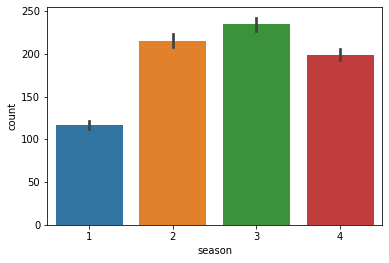

In [188]:
sns.barplot(x='season', y='count', data=data)

In [189]:
data.groupby('season')['count'].mean()


season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

Less Number of people take vehicle in spring season and more no bookings happen in Fall season

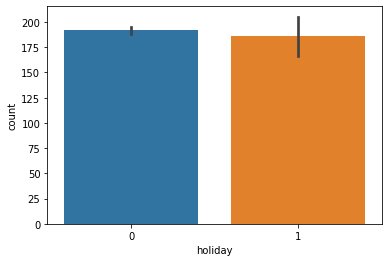

In [190]:
sns.barplot(x='holiday', y='count', data=data)

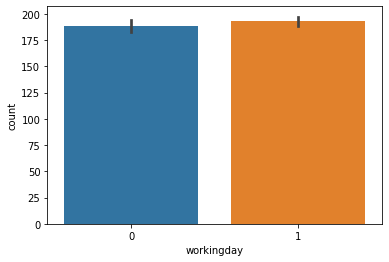

In [191]:
sns.barplot(x='workingday', y='count', data=data)

working day/ Holiday don't decide the count of vehicles hired. 

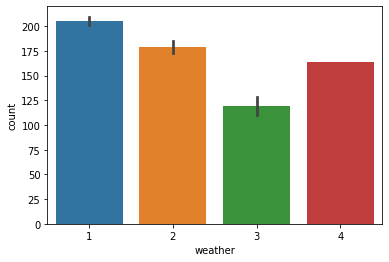

In [192]:
sns.barplot(x='weather', y='count', data=data)

1: Clear, Few clouds, partly cloudy, partly cloudy

-----More no of people hire in this weather

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

----------Less no of people hire vehicle in this season 


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [193]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Feature Engineering

In first look it seems count is sum of Casual & registered. Let us check if it is true 

In [194]:
data['check']= data['casual']+data['registered']

In [195]:
#data['if_equal']=(data['temp']==data['count'])

(data['check']==data['count']).value_counts()

True    10886
dtype: int64

In [196]:
data.drop('check',axis='columns',inplace=True)

Since we know that count is our target variable. so these two Variables are  of no use to us, as they don't contribute to our Information. Let us drop them

In [197]:
data.drop(['casual','registered'],axis='columns',inplace=True)

In [198]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


As of now datetime column in not giving us any info. we can extract :-

1.Year 

This won't be of any use for our analysis.

2.Date

This won't be of any use for our analysis

3.Month

This can give us idea about season but we already have another column for that

4.Time 

This can give us info about morning/evening/night(Duration of the day). this may effect the count.Let's Check.

In [199]:
data[['date','time']] = data['datetime'].str.split(' ',expand=True)

In [200]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,04:00:00


In [201]:
data[['hour','minute','sec']] = data['time'].str.split(':',expand=True)

In [202]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,time,hour,minute,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,00:00:00,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,01:00:00,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,02:00:00,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,03:00:00,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,04:00:00,04,00,00


In [203]:
data.drop(['datetime','date','minute','sec','time'],axis='columns',inplace=True)

In [204]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,00
1,1,0,0,1,9.02,13.635,80,0.0,40,01
2,1,0,0,1,9.02,13.635,80,0.0,32,02
3,1,0,0,1,9.84,14.395,75,0.0,13,03
4,1,0,0,1,9.84,14.395,75,0.0,1,04


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [206]:
data['hour']=data['hour'].astype(int)

In [207]:
#Replace hour=0 to hour=24 as it is midnight and 24 will be easy for our calculation

data['hour'] = data ['hour'].replace ( [00],24)

we assume that data at 00 is the number of vehicles booked from 11-12 at night.(this is how data would have been collected)

In [208]:
data['day_duration']=pd.cut(x=data['hour'],include_lowest=True, bins=[1,4,8,12,16,20,24],labels=['midnight-4','4-8','8-12','12-16','16-20','20-midnight'])

In [209]:
data.drop('hour',inplace=True,axis='columns')

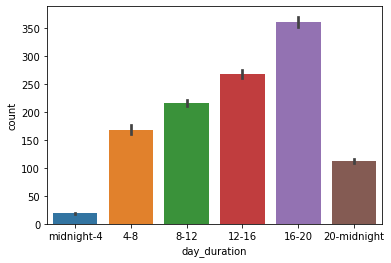

In [210]:
#day_duration is also a categorical Variable

sns.barplot(x='day_duration', y='count', data=data)


This figure clearly shows that duration of day effects the booking of vehicle. Most vehicles are booked between 4-8 in the evening and booking goes down between 12-4 at night.

#Outlier Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


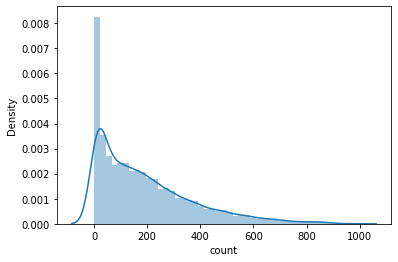

In [211]:
sns.distplot(data['count'])

**Data is right-skewed as seen from the figure.**

In [212]:
data['log_count']=np.log(data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


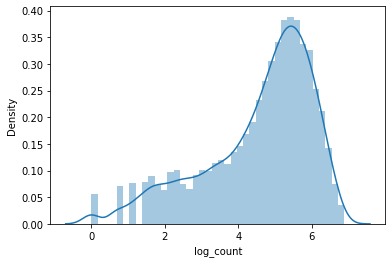

In [213]:
sns.distplot(data['log_count'])

After  taking log. Data is approximately Normally distributed.

Let us also Understand effect of taking LOG on Outliers. 

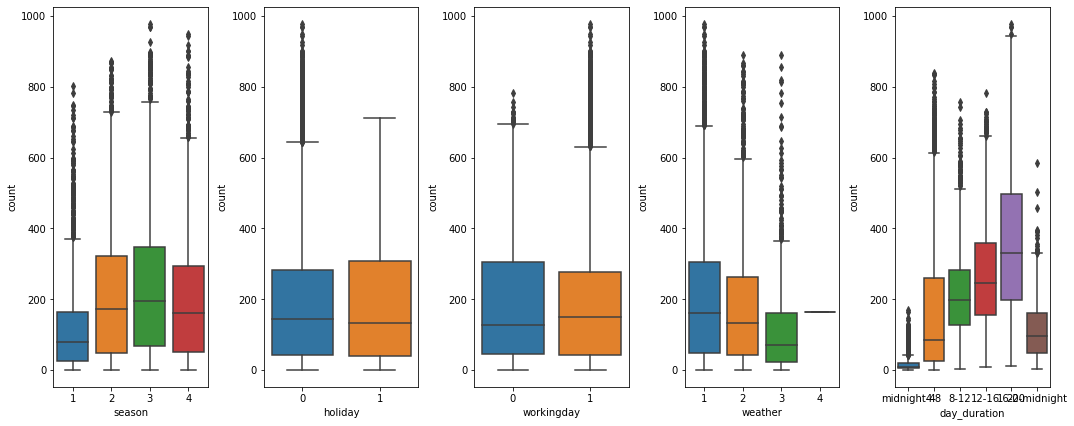

In [214]:
plt.figure(figsize=(15,6))
categorical_features=['season', 'holiday', 'workingday','weather','day_duration']
                        
for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='count', data=data)
 plt.tight_layout(pad=1)

as per above figure median is same for both groups of holiday & working day. so visually we can say workingday/holiday doesn't effect count. hypothesis testing can make things more clear 

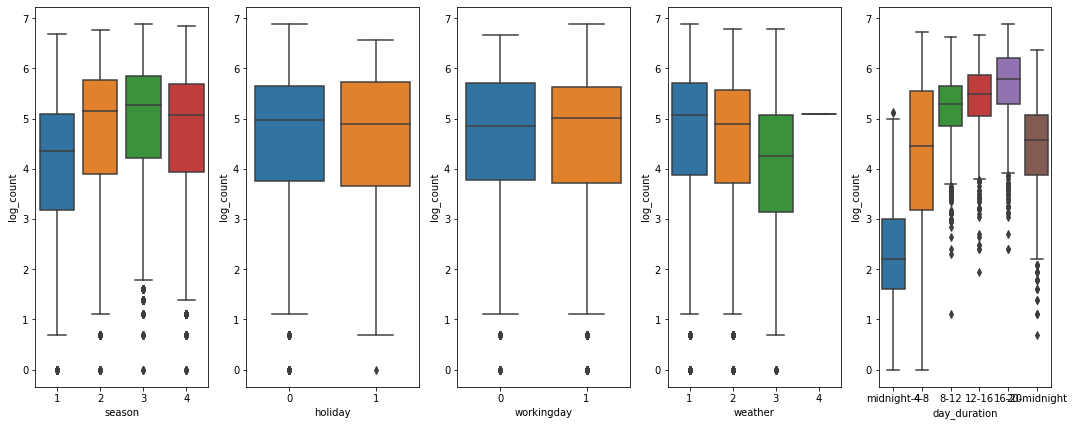

In [215]:
plt.figure(figsize=(15,6))
categorical_features=['season', 'holiday', 'workingday','weather','day_duration']
                        
for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='log_count', data=data)
 plt.tight_layout(pad=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


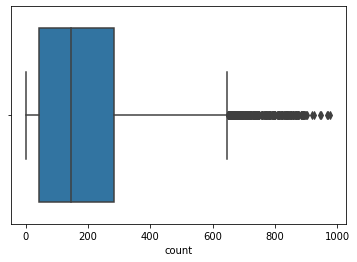

In [216]:
sns.boxplot(data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


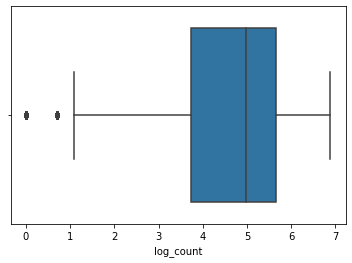

In [217]:
sns.boxplot(data['log_count'])

We can see from above figures that Log has helped us reduce ouliers significantly.

In [218]:
 q1=data['count'].quantile(0.25)
 q3=data['count'].quantile(0.75)
 iqr=q3-q1
 outlier_data=data[(data['count']<q1-1.5*iqr) | (data['count']>q3+1.5*iqr)]
 outlier_data.shape

(300, 11)

We can see that we have 300 Outliers, which is very small percent of our whole data. This data also don't contain any special Information. We can go ahead with deleting it. or we can use log_count for rest of our analysis. we will use log_count while doing Hypothesis test.

In [219]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day_duration,log_count
0,1,0,0,1,9.84,14.395,81,0.0,16,20-midnight,2.772589
1,1,0,0,1,9.02,13.635,80,0.0,40,midnight-4,3.688879
2,1,0,0,1,9.02,13.635,80,0.0,32,midnight-4,3.465736
3,1,0,0,1,9.84,14.395,75,0.0,13,midnight-4,2.564949
4,1,0,0,1,9.84,14.395,75,0.0,1,midnight-4,0.000000


**Now let us Focus on How continuous variables effect our Target variable i.e. count**

(Let us Ignore log_count for now)

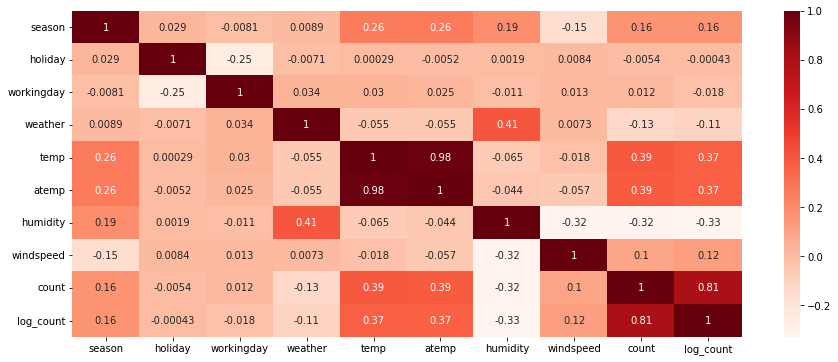

In [220]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap='Reds')

**We can clearly see that count is correlated with temp.**

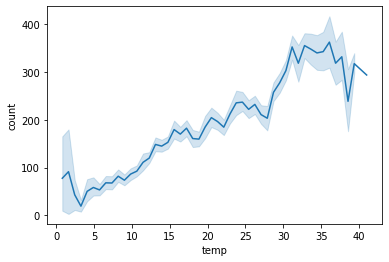

In [221]:
sns.lineplot(x='temp',y='count',data=data)


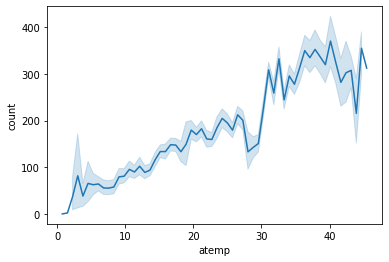

In [222]:
sns.lineplot(x='atemp',y='count',data=data)

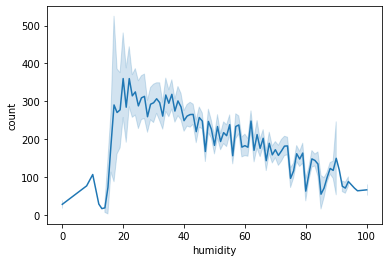

In [223]:
sns.lineplot(x='humidity',y='count',data=data)

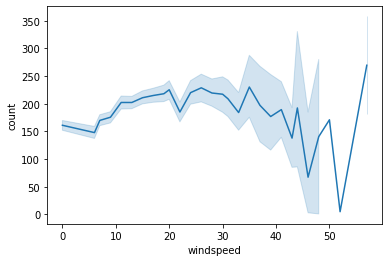

In [224]:
sns.lineplot(x='windspeed',y='count',data=data)

Above pictures tells us that Count is linearly related to temp and inversely related to humidity & windspeed

#Hypothesis Testing

#Anova 

**Why are we Using Anova??**

because we have more than 2 groups

1.No. of cycles rented similar or different in different seasons



NULL HYPOTHESIS: μ1 = μ2 = μ3 = μ3. The mean Count in every season is same.

ALTERNATIVE HYPOTHESIS: Atleast one of mean of count is not same

**Anova and all parametric tests assume-**

Normality:- Values in each sampled groups are assumed to be drawn from normally distributed populations. We can use normal probability plot or Q-Q plot to check normality.


Homogeneity of variance:- All the c group variances are equal, that is σ₁² = σ₂² = σ₃² = … = σ𝒸².

**Assumptions Test for Anova**

Anova assumes normality and also it assumes variances is same across all groups.


**Normality test**

**Shapiro-Wilk’s test** 

We will test the

null hypothesis: count  follows normal distribution

against the

alternative hypothesis: count doesn't follow normal distribution

In [225]:
from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(data['count'])
print('The p-value is', p_value)

The p-value is 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As mentioned on documentation of scipy, when no of data points>5000, this test fails. let's  move to another test

**Let's do normality test using distplot.**

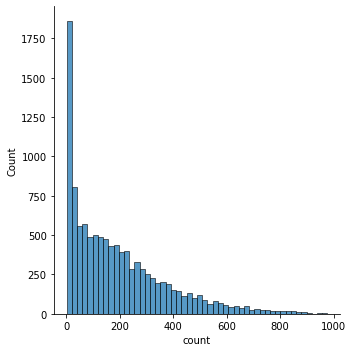

In [226]:
sns.displot(data['count'],bins=50)

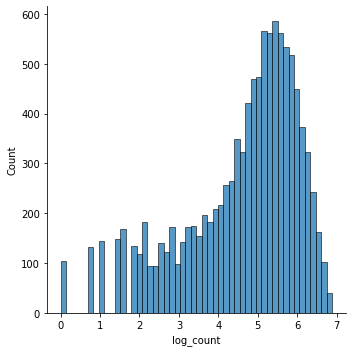

In [227]:
sns.displot(data['log_count'],bins=50)

**it is visible from distplot that count is not normally distributed but log_count is normally distributed**

**Another Test for normality**

**QQ-PLOT**

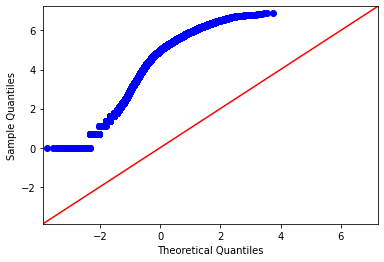

In [228]:
import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(data['log_count'], line ='45')
py.show()

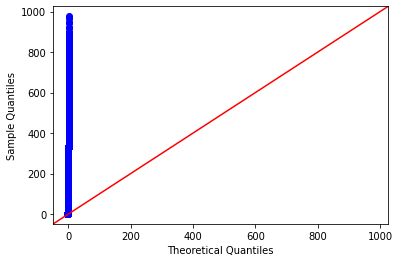

In [229]:
import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(data['count'], line ='45')
py.show()

None of the two Variables are Normally distributed as per QQ-plot. But still log_count is better. 

So we Will continue our analysis with log_count as we have huge data.

**Test for Equality of Variances**

**Levene’s test**

We will test the

null hypothesis : All the count variances are equal

against the

alternative hypothesis : At least one variance is different from the rest.

In [230]:
data.groupby('season')['log_count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,3.984206,1.539737,0.0,3.178054,4.356709,5.099866,6.685861
2,2733.0,4.703267,1.462172,0.0,3.891820,5.147494,5.771441,6.771936
3,2733.0,4.860311,1.378662,0.0,4.219508,5.273000,5.849325,6.884487
4,2734.0,4.652650,1.421134,0.0,3.931826,5.081404,5.683580,6.854355


Here we see that std across all groups are almost same. so it should not have any Variances. Let's check statistically

In [231]:
from scipy.stats import levene
statistic, p_value = levene(
 data[data['season']==1]['log_count'].sample(2686),
 data[data['season']==2]['log_count'].sample(2686),
 data[data['season']==3]['log_count'].sample(2686),
 data[data['season']==4]['log_count'].sample(2686)
 )
# find the p-value
print('The p-value is ',p_value)

The p-value is  1.443327498933743e-06


P-Value is > 0.05 which means null hypothesis is true means they are not having Variances.

Now let's check Anova.Alternate & Null hypothesis are mentioned above.

In [232]:
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(data[data['season']==1]['log_count'].sample(2686),
 data[data['season']==2]['log_count'].sample(2686),
 data[data['season']==3]['log_count'].sample(2686),
 data[data['season']==4]['log_count'].sample(2686))
# print the p-value
print('The p-value is', p_value)

The p-value is 6.639506024409239e-120


P-value is low. so Null hypothesis is False. 

The mean Count in every season is not same.i.e. season effect count. 

proved statistically.

#Hypothesis testing using t-test

**Let's do Hypotheis testing to understand if workingday has effect on count.**

**Step 1: Define null and alternative hypothesis**

Null hypothesis: Number of cycles hired on a weekday is equal to the number of cycles hired on a weekend

Alternate Hypothesis: count on weekday is not equal to count on the weekend


**Step 2: Decide the significance level**. If P values is less than alpha reject the null hypothesis.

α = 0.05

**Step3:**

Standard deviation of the population is not known ,will perform a T stat test. 

Not equal to sign in alternate hypothesis indicate its a two tailed test.

𝐻0 : 𝜇1 = 𝜇2

𝐻𝑎: 𝜇1 != 𝜇2

In [233]:
data.groupby('workingday')['log_count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,4.591984,1.381237,0.0,3.784190,4.85203,5.717028,6.663133
1,7412.0,4.534084,1.536713,0.0,3.713572,5.01728,5.624018,6.884487


In [234]:
working_day=data[data['workingday']==1]['log_count'].sample(3474)
non_working_day=data[data['workingday']==0]['log_count'].sample(3474)

In [235]:
from scipy import stats
alpha=0.05
t_statistic, p_value = stats.ttest_ind(working_day,non_working_day,alternative='two-sided')  

In [236]:
print("Test statistic = {} , Pvalue ={} ".format(t_statistic,p_value ))

Test statistic = -0.8630575603722584 , Pvalue =0.3881356182899327 


P-value is less than 0.05 . so, Null hypothesis is rejected. This means count is effected by day is working or not

#Hypothesis Testing using Chi-squared test

**Both are categorical variables**

**Test of independence.** 

**We are checking if weather and season has a relation.**

Null Hypothesis: Weather proportion is same across all season

Alternate Hypothesis: Weather proportions is different across different seasons

In [237]:
contigency= pd.crosstab(data.weather, data.season)
contigency

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Let us not include Weather = 4 in our analysis.

**Weather**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


**Season**

1: spring, 2: summer, 3: fall, 4: winter

In [238]:
data = data[data.weather != 4]

In [239]:
contigency= pd.crosstab(data.weather, data.season)
contigency

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [240]:
from scipy.stats import chi2_contingency # For Chi-Sq

In [241]:
chi2, pval, dof, exp_freq = chi2_contingency(contigency)
print("chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequency:{} ".format(chi2, pval, dof, exp_freq))

chi-square statistic: 46.101457310732485 , Pvalue: 2.8260014509929403e-08 , Degree of freedom: 6 ,expected frequency:[[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]] 


P-Value is low. so Null hypotheis is rejected. i.e. weather proportion isn't same across all season. so season has a effect on weather.

**Key observations**

Less Number of people take vehicle in spring season and more no bookings happen in Fall season

Less number of people hire cycle when it is slow rain and more number of people hire when weather is clear.

Most vehicles are booked between 4-8 in the evening and booking goes down between 12-4 at night.

Above pictures tells us that Count is linearly related to temp and inversely related to humidity & windspeed.


**Recommendations**

We can arrange more vehicles during peak booking hours, so that customers can get vehicle they need. Also, during night company can work with less number of vehicles, which can reduce cost for company.

We can hire more vehicles in Fall season as bookings are high.